In [ ]:
%matplotlib inline

In [65]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
import math
from math import prod
import time

# Basic Algebra Exercise - Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra

>[Basic Algebra Exercise - Functions, Polynomials, Complex Numbers. Applications of Abstract Algebra](#scrollTo=qIQwyjrvOBGY)

>>[Problem 1. Polynomial Interpolation](#scrollTo=vo40z3G9vZzX)

>>>[Solution - Separate the interpolating and the plotting function](#scrollTo=YzyVT_o5OBGc)

>>>>[Test: interpolation and extrapolation](#scrollTo=JNMfW7QMNV6n)

>>>>[Test: interpolate with smaller degree](#scrollTo=-6v9W-4oMFKa)

>>>>[Test: interpolate with higher degree](#scrollTo=UjXX9U2POBGc)

>>>>[Test: extrapolate with higher degree](#scrollTo=3iAiXLV79581)

>>[Problem 2. Complex Numbers as Vectors](#scrollTo=6LzT4w3wv5I6)

>>>[Solution](#scrollTo=AzOfIofFZXtI)

>>>>[Test: plot single complex number and a list of complex numbers:](#scrollTo=yR90QM_8aeud)

>>>>[Test: adding complex numbers](#scrollTo=y82jA503sG6n)

>>>>[Test: multiplying complex numbers](#scrollTo=JX4HcccWtaoa)

>>[Problem 3. Recursion and Fractals](#scrollTo=xwyPdVcSGnpL)

>>>[Recursive n factorial](#scrollTo=qutfYBNdI7Ho)

>>>>[Test](#scrollTo=CHNz-I60Ju8e)

>>>[Iterative n factorial](#scrollTo=APzbQPC-JFRB)

>>>>[Test](#scrollTo=oOPzwYNvMfz3)

>>>[Endless sequences](#scrollTo=pToUfMTWOBGf)

>>>>[Test nat](#scrollTo=xD2N77pEPKwl)

>>>>[Test even](#scrollTo=enWA6z3tQxm7)

>>>>[Test factorial_generator](#scrollTo=MGwB8ZnBTd9f)

>>>>[Test fibonacci_generator](#scrollTo=OPzyJs7NYeJq)

>>>[The Mandelbrot set](#scrollTo=C3niKgZdOBGj)

>>>[Optional problem](#scrollTo=OBeE_foIOBGj)

>>[Problem 4. Run-length Encoding](#scrollTo=np0O0EGCOBGj)

>>>[Problem definition](#scrollTo=HXjiFlKZfPxb)

>>>[Solution - encoding and decoding functions](#scrollTo=gLSKg92BfKDh)

>>>>[Test encoding and decoding](#scrollTo=Zr6w8L6wfchO)

>>>[Measure compression ratio](#scrollTo=y85ZByfyhAtj)

>>[Problem 5. Function Invertibility and Cryptography](#scrollTo=n2Qnt8mC66Fj)

>>>[Problem definition](#scrollTo=BqlKXkHy66rV)

>[➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️](#scrollTo=JqBQfdi-e1hf)

>>>[Solution](#scrollTo=0NZa2ymh8vZA)

>>[Problem 6. Diffie - Hellman Key Exchange Simulation](#scrollTo=Dqi3H-7-OBGk)

>>[** Problem 7. The Galois Field in Cryptography](#scrollTo=YR2BiXUSOBGk)

>>[** Problem 8. Huffman Compression Algorithm](#scrollTo=Xz2smULwOBGl)

>[Mirka](#scrollTo=-JqNofveGpf5)

>[Test Mandelbrot Set](#scrollTo=OkYc_gsMbiLQ)

>[Test Mandelbrot 2](#scrollTo=O9dy7iA0d-tZ)



## Problem 1. Polynomial Interpolation

Given a set of $n$ data points with coordinates $(x_1; y_1), (x_2; y_2), \dots, (x_n; y_n)$, figure out what function may have generated these points and plot it.

### Solution - Separate the interpolating and the plotting function
Assumptions:
1. The points in our dataset are generated by a polynomial function
2. The points are very precise, there is absolutely no error in them. This means that the function should pass **through every point**

In [ ]:
def interpolate_polynomial(points, degree):
  """
  Interpolates a polynomial of the specified degree through the given points
  Input:
    points - a list of points (x, y) to plot
    degree - the polynomial degree
  """
  x = points[:, 0]
  y = points[:, 1]

  return Polynomial.fit(x, y, degree)

Create a generic plotting function that will plot 1 to 4 polynomials in a grid. The goal is to have several plots side by side for easy comparison.

In [ ]:
def plot_polynomials(polynomials):
  """
  Plots 1 to 4 polynomials
  Input:
    polynomials - a list of 1 to 4 tuples. Each tuple contains:
      poly - polinomial (the result of function interpolate_polynomial)
      points - a list of points (x, y) to plot (scatter)
      min_x, max_x - range of x values used to plot the interpolating polynomial
  Note: input validity ommited for brevity, the goal of the function is to experiement with polynomials and degree
  """
  colors = ["blue", "orange", "green", "red"]
  num_polynomials = len(polynomials)
  plot_rows = (lambda x: 1 if x in [1, 2, 3] else 2)(num_polynomials)
  plot_cols = (lambda x: x if x in [1, 2, 3] else 2)(num_polynomials)

  fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(5*plot_cols, 4*plot_rows))
  fig.tight_layout(pad=4)

  for i, (poly, points, min_x, max_x, title) in enumerate(polynomials):
      ax = axes if not isinstance(axes, np.ndarray) else axes[i] if len(axes.shape)==1 else axes[math.floor(i/2),i%2]

      plot_x = np.linspace(min_x, max_x, 1000)
      plot_y = poly(plot_x)

      ax.plot(plot_x, plot_y, f'tab:{colors[i]}')
      ax.scatter(points[:, 0], points[:, 1])

      ax.set_title(title)
      ax.set(xlabel='x', ylabel='y')

#### Test interpolation and extrapolation

In [ ]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])
poly = interpolate_polynomial(points, len(points) - 1)

plot_polynomials([(poly, points, np.min(points[:, 0]), np.max(points[:, 0]), "Polynomial Interpolation"), (poly, points, -5, 10, "Plynomial Extrapolation") ])

#### Test interpolate with smaller degree

In [ ]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 3)
poly2 = interpolate_polynomial(points, 2)
poly3 = interpolate_polynomial(points, 1)

min_max_x = (np.min(points[:, 0]), np.max(points[:, 0]))
plot_polynomials([(poly0, points, *min_max_x, "Degree=5"), (poly1, points, *min_max_x, "Degree=3"), (poly2, points, *min_max_x, "Degree=2"), (poly3, points, *min_max_x, "Degree=1")])

#### Test interpolate with higher degree

In [ ]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 7)
poly2 = interpolate_polynomial(points, 10)

min_max_x = (np.min(points[:, 0]), np.max(points[:, 0]))
plot_polynomials([(poly0, points, *min_max_x, "Degree=5"), (poly1, points, *min_max_x, "Degree=7"), (poly2, points, *min_max_x, "Degree=10")])

#### Test extrapolate with higher degree

In [ ]:
poly0 = interpolate_polynomial(points, 5)
poly1 = interpolate_polynomial(points, 7)
poly2 = interpolate_polynomial(points, 10)

plot_polynomials([(poly0, points, -10, 10, "Degree=5"), (poly1, points, -10, 10, "Degree=7"), (poly2, points, -10, 10, "Degree=10")])

## Problem 2. Complex Numbers as Vectors

Plot complex numbers as radius vectors.

### Solution

Functions to plot a single complex number and a list of complex numbers:

In [111]:
def plot_complex_number(subplot, z):
    """
    Plots a single complex number z as a radius vector in the passed 2D subplot
    """
    subplot.quiver(0, 0, z.real, z.imag, angles = "xy", scale_units = "xy", scale = 1)
    subplot.set_xticks(range(-4, 5))
    subplot.set_yticks(range(-4, 5))

def plot_complex_numbers(subplot, numbers, colors):
    """
    Plots the given list of complex numbers as radius vectors in the passed 2D subplot
    """
    x1 = [0] * len(numbers)
    y1 = [0] * len(numbers)
    x2 = [z.real for z in numbers]
    y2 = [z.imag for z in numbers]
    subplot.quiver(x1, y1, x2, y2, angles = "xy", scale_units = "xy", scale = 1, color = colors)

    subplot.set_xticks(range(-4, 5))
    subplot.set_yticks(range(-4, 5))

#### Test plotting single complex number and a list of complex numbers

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5*2, 4*1))
fig.tight_layout(pad=4)

ax1.set_title("Single vector")
plot_complex_number(ax1, 2 + 3j)

ax2.set_title("Multiple vectors")
plot_complex_numbers(ax2, [2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])

#### Test adding complex numbers

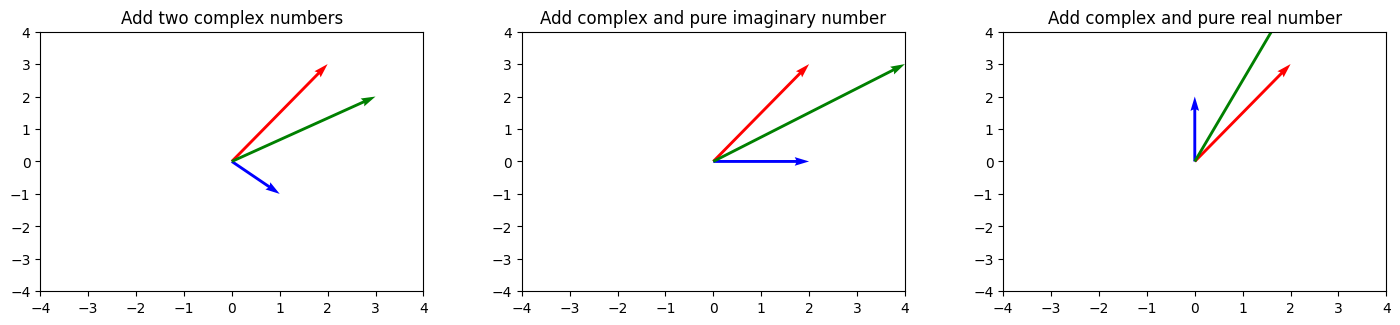

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5*3, 4*1))
fig.tight_layout(pad=4)

ax1.set_title("Add two complex numbers")
z1 = 2 + 3j
z2 = 1 - 1j
plot_complex_numbers(ax1, [z1, z2, z1 + z2], ["red", "blue", "green"])

ax2.set_title("Add complex and pure imaginary number")
z1 = 2 + 3j
z2 = 2 + 0j
plot_complex_numbers(ax2, [z1, z2, z1 + z2], ["red", "blue", "green"])

ax3.set_title("Add complex and pure real number")
z1 = 2 + 3j
z2 = 0 + 2j
plot_complex_numbers(ax3, [z1, z2, z1 + z2], ["red", "blue", "green"])

#### Test multiplying complex numbers

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5*2, 4*2))
fig.tight_layout(pad=4)

z = 2 + 3j
ax1.set_title("Multiply complex number by 1")
plot_complex_numbers(ax1, [z, z * 1], ["red", "blue"])

ax2.set_title("Multiply complex number by -1")
plot_complex_numbers(ax2, [z, z * -1], ["red", "blue"])

ax3.set_title("Multiply complex number by j")
plot_complex_numbers(ax3, [z, z * 1j], ["red", "blue"])

ax4.set_title("Multiply complex number by -j")
plot_complex_numbers(ax4, [z, z * -1j], ["red", "blue"])

## Problem 3. Recursion and Fractals

### Recursive n factorial

In [ ]:
def factorial_recursive(n):
    """
    Computes the factorial of a non-negative number n (using recursion)
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("Input must be a non-negative number")

    if n == 0:
        return 1

    return n * factorial_recursive(n - 1)

#### Test recursive n factorial

In [ ]:
assert factorial_recursive(0) == 1
assert factorial_recursive(1) == 1
assert factorial_recursive(5) == 120
assert factorial_recursive(10) == 3628800
assert factorial_recursive(100) == 93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
assert factorial_recursive(500) == 1220136825991110068701238785423046926253574342803192842192413588385845373153881997605496447502203281863013616477148203584163378722078177200480785205159329285477907571939330603772960859086270429174547882424912726344305670173270769461062802310452644218878789465754777149863494367781037644274033827365397471386477878495438489595537537990423241061271326984327745715546309977202781014561081188373709531016356324432987029563896628911658974769572087926928871281780070265174507768410719624390394322536422605234945850129918571501248706961568141625359056693423813008856249246891564126775654481886506593847951775360894005745238940335798476363944905313062323749066445048824665075946735862074637925184200459369692981022263971952597190945217823331756934581508552332820762820023402626907898342451712006207714640979456116127629145951237229913340169552363850942885592018727433795173014586357570828355780158735432768888680120399882384702151467605445407663535984174430480128938313896881639487469658817504506926365338175055478128640000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### Iterative n factorial

In [ ]:
def factorial_iterative(n):
    """
    Computes the factorial of a non-negative number n (using iteration)
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("Input must be a non-negative number")

    result = 1

    for i in range(1, n + 1):
        result *= i

    return result

#### Test iterative n factorial

In [ ]:
assert factorial_iterative(0) == 1
assert factorial_iterative(1) == 1
assert factorial_iterative(5) == 120
assert factorial_iterative(10) == 3628800
assert factorial_iterative(100) == 93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
assert factorial_iterative(500) == 1220136825991110068701238785423046926253574342803192842192413588385845373153881997605496447502203281863013616477148203584163378722078177200480785205159329285477907571939330603772960859086270429174547882424912726344305670173270769461062802310452644218878789465754777149863494367781037644274033827365397471386477878495438489595537537990423241061271326984327745715546309977202781014561081188373709531016356324432987029563896628911658974769572087926928871281780070265174507768410719624390394322536422605234945850129918571501248706961568141625359056693423813008856249246891564126775654481886506593847951775360894005745238940335798476363944905313062323749066445048824665075946735862074637925184200459369692981022263971952597190945217823331756934581508552332820762820023402626907898342451712006207714640979456116127629145951237229913340169552363850942885592018727433795173014586357570828355780158735432768888680120399882384702151467605445407663535984174430480128938313896881639487469658817504506926365338175055478128640000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

assert factorial_recursive(37) == factorial_iterative(37)
assert factorial_recursive(314) == factorial_iterative(314)

### Endless sequences

1: Write a funciton `nat` that priduces an endless list of natual numbers.

2: Use this to define a smaller, but just as infinite, sequence of even numbers.

3: Use the approach above to rewrite the factorial function in a "lazy" way.

4: Use the same approach to return the Fibonacci sequence

In [ ]:
def nat():
    """Returns all natural numbers"""
    n = 0
    while True:
        yield n
        n += 1

In [ ]:
def even():
    """Returns all even numbers"""
    natural_numbers = nat()
    while True:
        yield 2 * next(natural_numbers)

In [ ]:
def factorial_generator(n):
    """
    A generator that computes the factorial of a given number n and yields the next factorial until it reaches the end.
    Input:
        n (int): The number for which the factorial sequence will be generated.
    Yields:
        The next factorial in the sequence.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative number")

    if n == 0:
        yield 1

    factorial = 1
    for i in range(1, n+1):
        factorial *= i
        yield factorial

In [ ]:
def fibonacci_generator(n):
    """
    A generator that computes the Fibonacci sequence and yields each number in the sequence until it reaches the specified number of terms n.
    Input:
        n: The number of terms in the Fibonacci sequence to be generated. Must be a non-negative integer.
    Yields:
        The next number in the Fibonacci sequence.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("n must be a non-negative number")

    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

#### Test `nat`

In [ ]:
natural_numbers = nat()

assert(next(natural_numbers) == 0)
assert(next(natural_numbers) == 1)
assert(next(natural_numbers) == 2)

for _ in range(0, 100):
    next(natural_numbers)

assert(next(natural_numbers) == 103)

#### Test `even`

In [ ]:
even_natural_numbers = even()

assert(next(even_natural_numbers) == 0)
assert(next(even_natural_numbers) == 2)
assert(next(even_natural_numbers) == 4)

for _ in range(0, 100):
    next(even_natural_numbers)

assert(next(even_natural_numbers) == 206)

#### Test `factorial_generator`

In [ ]:
assert list(factorial_generator(0)) == [1]
assert list(factorial_generator(1)) == [1]
assert list(factorial_generator(2)) == [1, 2]
assert list(factorial_generator(3)) == [1, 2, 6]
assert list(factorial_generator(4)) == [1, 2, 6, 24]
assert list(factorial_generator(5)) == [1, 2, 6, 24, 120]

#### Test `fibonacci_generator`

In [ ]:
assert list(fibonacci_generator(0)) == []
assert list(fibonacci_generator(1)) == [0]
assert list(fibonacci_generator(2)) == [0, 1]
assert list(fibonacci_generator(3)) == [0, 1, 1]
assert list(fibonacci_generator(4)) == [0, 1, 1, 2]
assert list(fibonacci_generator(5)) == [0, 1, 1, 2, 3]

⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬⏬

Use the approach above to rewrite the factorial function in a "lazy" way.

Use **the same approach** to return the Fibonacci sequence - another famous one in mathematics.

In [ ]:
def fibonacci(n):
    # Write your docstring and code
    pass

### The Mandelbrot set

Inspired by [this](https://colab.research.google.com/github/theofil/CompPhysics/blob/master/examples/mandelbrot.ipynb#scrollTo=lNtiF_n1Fjoa) notebook, which is adapted from the [numpy  docs](https://numpy.org/doc/stable/user/quickstart.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print ('%r (%r, %r) %2.2f sec' % (method.__name__, args, kw, te-ts))
        return result

    return timed

@timeit
def mandelbrot(height, width, maxit=20):
    """Returns an image of the Mandelbrot fractal of size height x width."""
    y, x = np.ogrid[ -1.4:1.4:height*1j, -2:0.8:width*1j ]
    c = x+y * 1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2         # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much
    return divtime

ax, fig = plt.subplots(figsize=(10,10))
plt.imshow(mandelbrot(400, 400, 500))
plt.show()

### * Optional problem
Try to recreate a Lindermeyer system (also known as **L-system**, [source](https://en.wikipedia.org/wiki/L-system)). These are systems created via a series of replacement rules.

In [ ]:
# Write your code here

## Problem 4. Run-length Encoding

1: Write a function that encodes a given text using [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding). Write another one that decodes.


2: Test your encoding and decoding functions on a DNA sequence (you can look up some on the Internet).

3: Measure how much your data is compressed relative to the original.

### Solution - encoding and decoding functions

In [ ]:
def encode(input):
    """
    Returns the run-length encoded version of the text
    (numbers after symbols, length = 1 is skipped)
    """
    next_substring_offset = lambda s: next((i for i in range(len(s)) if s[0] != s[i]), len(s))

    offset = 0
    result = ""

    while offset < len(input):
        next_offset = next_substring_offset(input[offset:])
        chunk = input[offset:offset+next_offset]
        chunk_len = len(chunk)
        offset += chunk_len

        first = chunk[0]
        result += f"{chunk[0]}{chunk_len if chunk_len > 1 else ''}"
    return result

def decode(input):
    """
    Decodes the text using run-length encoding
    """
    offset = 0
    result = ""
    next_substring = lambda input, offset, length: input[offset: offset + min(length, len(input)-offset)]

    while offset < len(input):
        chunk = next_substring(input, offset, 2) # get next 2 chars, 1 if this is the last char
        first, second = (chunk + ' ')[:2]        # unpack safely, 'second' can be ' '
        if second.isalpha() or second == ' ':
            result += first
            offset += 1
        else:
            result += first * int(second)
            offset += 2
    return result

#### Test encoding and decoding

In [ ]:
data = [("", ""),
        ("A", "A"),
        ("AA", "A2"),
        ("AAA", "A3"),
        ("AB", "AB"),
        ("ABBB", "AB3"),
        ("AAAAAABAAAAAA", "A6BA6"),
        ("ABCDEFABCDEF", "ABCDEFABCDEF"),
        ("ABBCCCDDDDEEEEEFFFFFF", "AB2C3D4E5F6"),
        ("atcgaacggtatcttcatttctggtcctccctgaggcgggcccgtgtaaccaatcgatacccgtatgaactgtgatgttgtatttaacatcgaacggatagagatcttcatgccccctctccgaacgttagtgcatggagcctgaggcagctcctggcgtcagatgtggctatacgttgtcgtacaacgattataggagccagttcgcccctgggagggtgacaacaatctcaaatatgacctccatcaaaacgcgttgaggacattaccgaacacatagcctccgcgcacttgttgattaactggcagcggcccttcgctgacaaaaagcgtattcgaacgtgctacctgcctccggcatgtactcattggttggctacttagctgcaccaagatccccagtgcaccaacggatcagggttctgtctgctgccaggtatgtcgaccacaggcatccccgagctgcctgtctaggtgacagacgcgaagagtctctcgcaatacacttacccgcgaagtcctttgagtattcactcttccgattagtagaagcacgtcttgcggaattgtttcctaagtgctttcactggggtagtcgtacatacacccgacgtacaacgttccgtagtgcattgatctaaaatgtcaagtgagtgctaaacttgactcccgaggagaatgttgattttgtcgtgcttgtggttagtgtgcgtatttaacttaaagatgaccgtagaaacatggcagcggagaaagtcgcctcgctggtgaatatttgtagcggagcggccgcgacgagtggcgtctctcagcacacgccaacggggactgtgtctaaccggggcgtatggggtaagtgcacttaattgtggcgatgtagctatgcaaattatatccccaatgatgtggtatccaccctgggttggcaggccgagggagccggctcacgccgaacggatctcacgaataagtgttaatataacaagggggtatgctttat", "atcga2cg2tatct2cat3ctg2tc2tc3tgag2cg3c3gtgta2c2a2tcgatac3gtatga2ctgtgatgt2gtat3a2catcga2cg2atagagatct2catgc5tctc2ga2cgt2agtgcatg2agc2tgag2cagctc2tg2cgtcagatgtg2ctatacgt2gtcgtaca2cgat2atag2agc2agt2cgc4tg3ag3tgaca2ca2tctca3tatgac2tc2atca4cgcgt2gag2acat2ac2ga2cacatagc2tc2gcgcact2gt2gat2a2ctg2cagcg2c3t2cgctgaca5gcgtat2cga2cgtgctac2tgc2tc2g2catgtactcat2g2t2g2ctact2agctgcac2a2gatc4agtgcac2a2cg2atcag3t2ctgtctgctgc2ag2tatgtcgac2acag2catc4gagctgc2tgtctag2tgacagacgcga2gagtctctcgca2tacact2ac3gcga2gtc2t3gagtat2cactct2c2gat2agtaga2gcacgtct2gcg2a2t2gt3c2ta2gtgct3cactg4tagtcgtacatacac3gacgtaca2cgt2c2gtagtgcat2gatcta4tgtca2gtgagtgcta3ct2gactc3gag2aga2tgt2gat4gtcgtgct2gtg2t2agtgtgcgtat3a2ct2a3gatgac2gtaga3catg2cagcg2aga3gtcgc2tcgctg2tga2tat3gtagcg2agcg2c2gcgacgagtg2cgtctctcagcacacgc2a2cg4actgtgtcta2c2g4cgtatg4ta2gtgcact2a2t2gtg2cgatgtagctatgca3t2atatc4a2tgatgtg2tatc2ac3tg3t2g2cag2c2gag3agc2g2ctcacgc2ga2cg2atctcacga2ta2gtgt2a2tata2ca2g5tatgct3at")]

for original, encoded in data:
    assert encode(original) == encoded
    assert decode(encoded) == original

### Measure compression ratio

In [ ]:
dna = "atcgaacggtatcttcatttctggtcctccctgaggcgggcccgtgtaaccaatcgatacccgtatgaactgtgatgttgtatttaacatcgaacggatagagatcttcatgccccctctccgaacgttagtgcatggagcctgaggcagctcctggcgtcagatgtggctatacgttgtcgtacaacgattataggagccagttcgcccctgggagggtgacaacaatctcaaatatgacctccatcaaaacgcgttgaggacattaccgaacacatagcctccgcgcacttgttgattaactggcagcggcccttcgctgacaaaaagcgtattcgaacgtgctacctgcctccggcatgtactcattggttggctacttagctgcaccaagatccccagtgcaccaacggatcagggttctgtctgctgccaggtatgtcgaccacaggcatccccgagctgcctgtctaggtgacagacgcgaagagtctctcgcaatacacttacccgcgaagtcctttgagtattcactcttccgattagtagaagcacgtcttgcggaattgtttcctaagtgctttcactggggtagtcgtacatacacccgacgtacaacgttccgtagtgcattgatctaaaatgtcaagtgagtgctaaacttgactcccgaggagaatgttgattttgtcgtgcttgtggttagtgtgcgtatttaacttaaagatgaccgtagaaacatggcagcggagaaagtcgcctcgctggtgaatatttgtagcggagcggccgcgacgagtggcgtctctcagcacacgccaacggggactgtgtctaaccggggcgtatggggtaagtgcacttaattgtggcgatgtagctatgcaaattatatccccaatgatgtggtatccaccctgggttggcaggccgagggagccggctcacgccgaacggatctcacgaataagtgttaatataacaagggggtatgctttat"
dna_encoded = encode(dna)

encoding_ratio = round(1 - len(dna_encoded) / len(dna), 2)

print(f"The encoding ratio is {encoding_ratio}%")

## * Problem 5. Function Invertibility and Cryptography

### Problem definition

1: Specify a sequence of bit lengths, in increasing order. For example, you might choose something like [10, 20, 25, 30, 32, 33, 35, 38, 40]. Depending on your computer's abilities you can go as high as you want.

2: For each bit length, generate a number.

3: See how much time it takes to factor it.

4: Then see how much time it takes to multiply the factors.
In order to have better accuracy, do it multiple times, and average the results.

5: Plot all multiplication and factorization times as a function of the number of bits.

### Solution

Random numbers:    [932, 998025, 929776789, 986203071074, 681232826714665, 669269732711821646]
Factors List:      [{2: 2, 233: 1}, {3: 1, 5: 2, 7: 1, 1901: 1}, {929776789: 1}, {2: 1, 13: 1, 67: 2, 823: 1, 10267: 1}, {5: 1, 16901719: 1, 8061107: 1}, {2: 1, 37: 1, 397: 1, 3797: 1, 4253: 1, 1410727: 1}]
Time to factor:    [0.007, 0.008, 0.249, 0.197, 7.28, 0.504]
Time to multiply:  [0.001, 0.002, 0.001, 0.002, 0.001, 0.002]


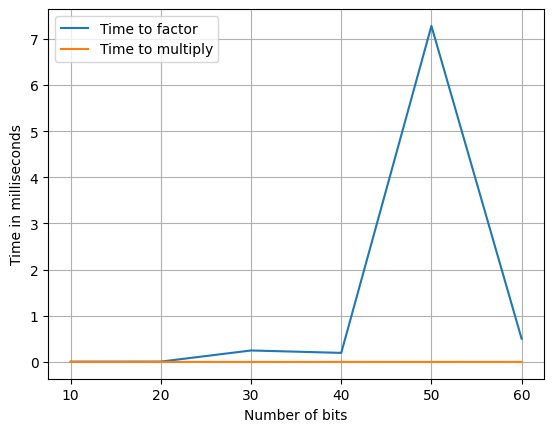

In [110]:
def measure_execution_time(function_to_measure, arg, iterations):
    start_time = time.time()
    [ function_to_measure(arg) for _ in range(iterations)]
    end_time = time.time()
    average_time = ((end_time - start_time) / iterations) * 1000
    return (round(average_time, 3))

def get_multiplied_factors(factors):
    return prod(base ** exponent for base, exponent in factors.items())

bit_lengths = [10, 20, 30, 40, 50, 60]
random_numbers = [ secrets.randbits(n) for n in bit_lengths ]
factors_list = [ factorint(n) for n in random_numbers ]
time_to_factor = [ measure_execution_time(factorint, arg, 1000) for arg in random_numbers ]
time_to_multiply = [ measure_execution_time(get_multiplied_factors, arg, 1000) for arg in factors_list ]

print("Random numbers:   ", random_numbers)
print("Factors List:     ", factors_list)
print("Time to factor:   ", time_to_factor)
print("Time to multiply: ", time_to_multiply)

plt.plot(bit_lengths, time_to_factor)
plt.plot(bit_lengths, time_to_multiply)
plt.legend(["Time to factor", "Time to multiply"])
plt.xlabel("Number of bits")
plt.ylabel("Time in milliseconds")
plt.grid()
plt.show()

## * Problem 6. Diffie - Hellman Key Exchange Simulation
As we already saw, there are functions which are very easy to compute in the "forward" direction but really difficult (computationally) to invert (that is, determine the input from the output). There is a special case: the function may have a hidden "trap door". If you know where that door is, you can invert the function easily. This statement is at the core of modern cryptography.

Look up **Diffie - Hellman key exchange** (here's a [video](https://www.youtube.com/watch?v=cM4mNVUBtHk) on that but feel free to use anything else you might find useful).

Simulate the algorithm you just saw. Generate large enough numbers so the difference is noticeable (say, factoring takes 10-15 seconds). Simulate both participants in the key exchange. Simulate an eavesdropper.

First, make sure after both participants run the algorithm, they have *the same key* (they generate the same number).

Second, see how long it takes for them to exchange keys.

Third, see how long it takes the eavesdropper to arrive at the correct shared secret.

You should be able to see **the power of cryptography**. In this case, it's not that the function is irreversible. It can be reversed, but it takes a really long time (and with more bits, we're talking billions of years). However, if you know something else (this is called a **trap door**), the function becomes relatively easy to invert.

In [ ]:
# Write your code here

## ** Problem 7. The Galois Field in Cryptography
Research about the uses of the Galois field. What are its properties? How can it be used in cryptography? Write a simple cryptosystem based on the field. Research production-grade systems based on the Galois field.

You can use the following questions to facilitate your research:
* What is a field?
* What is GF(2)? Why is it an algebraic field?
* How and why do we extend the field to have more elements, like GF(3), GF(4), etc.? Do they have any practical applications?
* What is perfect secrecy? How does it relate to the participants in the conversation, and to the outside eavesdropper?
* What is symmetrical encryption?
* How to encrypt one-bit messages?
* How to extend the one-bit encryption system to many buts?
* Why is the system decryptable? How do the participants decrypt the encrypted messages?
* Why isn't the eavesdropper able to decrypt?
* What is a one-time pad?
    * How does the one-time pad achieve perfect secrecy?
* What happens if we try to use a one-time pad many times?
    * Provide an example where you break the "many-time pad" security
* What are some current enterprise-grade applications of encryption over GF(2)?
* Implement a cryptosystem based on GF(2). Show correctness on various test cases

## ** Problem 8. Huffman Compression Algorithm
Examine and implement the **Huffman algorithm** for compressing data. It's based on information theory and probability theory. Document your findings and provide your implementation.

This algorithm is used for **lossless compression**: compressing data without loss of quality. You can use the following checklist:

* What is the difference between lossless and lossy compression?
* When can we get away with lossy compression?
* What is entropy?
* How are Huffman trees constructed?
    * Provide a few examples
* How can we get back the uncompressed data from the Huffman tree?
* How and where are Huffman trees stored?
* Implement the algorithm. Add any other formulas / assumptions / etc. you might need.
* Test the algorithm. A good measure would be percentage compression: $$\frac{\text{compressed}}{\text{uncompressed}} * 100\%$$
* How well does Huffman's algorithm perform compared to other compression algorithms (e.g. LZ77)?